In [4]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\lib\site-packages\flask_cors-5.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\lib\site-packages\gevent-24.11.1-py3.12-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\lib\site-packages\quiver_engine-0.1.4.1.5-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\li

In [14]:
pip install ultralytics

   ---------------------------------------- 0.0/976.9 kB ? eta -:--:--
   -------------------------------- ------- 786.4/976.9 kB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 976.9/976.9 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.6 MB 6.3 MB/s eta 0:00:02
   ------ --------------------------------- 2.1/12.6 MB 6.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.6 MB 5.7 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.6 MB 6.0 MB/s eta 0:00:02
   --------------------- ------------------ 6.8/12.6 MB 6.3 MB/s eta 0:00:01
   ------------------------- -------------- 7.9/12.6 MB 6.3 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.6 MB 6.2 MB/s eta 0:00:01
   --------------------------------- ------ 10.5/12.6 MB 6.1 MB/s eta 0:00:01
   ----------------------------------- ---- 11.3/12.6 MB 6.0 MB/s eta 0:00:01
   -

DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\lib\site-packages\flask_cors-5.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\lib\site-packages\gevent-24.11.1-py3.12-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\lib\site-packages\quiver_engine-0.1.4.1.5-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\li

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vasukipatel/face-recognition-dataset")

print("Path to dataset files:", path)

c:\Users\User\anaconda3\envs\cv_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 726M/726M [01:54<00:00, 6.67MB/s] 

Extracting files...


Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\vasukipatel\face-recognition-dataset\versions\1


In [4]:
import os
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [96]:
from ultralytics import YOLO
model = YOLO('yolov8n-face-lindevs.pt')

In [98]:
def processing(path, save_dir):
    img = Image.open(path)
    img_np = np.array(img)
    result = model(img_np)
    boxes = result[0].boxes.xyxy
    for box in boxes:
        xmin, ymin, xmax, ymax = map(int, box)  # Преобразуем координаты в целые числа
        im = img_np[ymin:ymax, xmin:xmax]
    im = Image.fromarray(im)
    folder_path = save_dir + '/' + path.split('\\')[-2]
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    im.save(save_dir + '/' + path.split('\\')[-2] + '/' + path.split('\\')[-1])

In [99]:
dataset_dir = path + '/Original Images/Original Images'
for subdir in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdir)
    if os.path.isdir(subdir_path):
        image_files = [f for f in os.listdir(subdir_path) if f.endswith('.jpg')]
        for image_name in image_files:
            image_path = os.path.join(subdir_path, image_name)
            # print(image_path.split('\\')[-2] + '/' + image_path.split('\\')[-1])
            processing(image_path, 'save_dir_yolo')


0: 640x448 1 face, 77.4ms
Speed: 3.4ms preprocess, 77.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)

0: 640x640 1 face, 83.7ms
Speed: 7.1ms preprocess, 83.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 face, 59.4ms
Speed: 2.1ms preprocess, 59.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 512x640 1 face, 136.1ms
Speed: 2.1ms preprocess, 136.1ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)

0: 384x640 1 face, 237.5ms
Speed: 3.9ms preprocess, 237.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 face, 138.3ms
Speed: 3.9ms preprocess, 138.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 1 face, 113.1ms
Speed: 4.9ms preprocess, 113.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 544x640 1 face, 103.3ms
Speed: 4.7ms preprocess, 103.3ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640

In [93]:
def get_size(path):
    im = Image.open(path)
    return [im.width, im.height]

In [102]:
folder_yolo = 'save_dir_yolo'
count_people = {}
for folder in os.listdir(folder_yolo):
    subfolder = os.path.join(folder_yolo, folder)
    count_people[folder] = 0
    for file in os.listdir(subfolder):
        count_people[folder] += 1

In [105]:
import seaborn as sns

In [110]:
count_people.values()

dict_values([50, 92, 79, 74, 92, 68, 98, 120, 87, 78, 96, 80, 61, 71, 75, 106, 101, 112, 108, 30, 70, 72, 32, 105, 102, 113, 77, 58, 115, 49, 91])

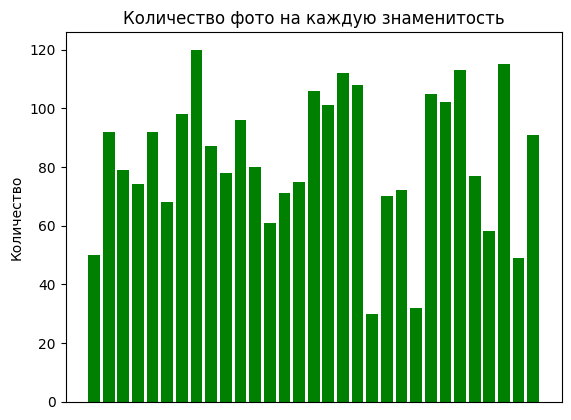

In [114]:
plt.bar(count_people.keys(), count_people.values(), color='g')
plt.xticks([])  # Устанавливаем пустые метки на оси X

# Добавление заголовка и меток осей (по желанию)
plt.title('Количество фото на каждую знаменитость')
plt.ylabel('Количество')

# Показать график
plt.show()

In [159]:
pip install imgaug

   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/948.0 kB ? eta -:--:--
   ---------------------------------------- 948.0/948.0 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.4 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\lib\site-packages\flask_cors-5.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\lib\site-packages\gevent-24.11.1-py3.12-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\lib\site-packages\quiver_engine-0.1.4.1.5-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\anaconda3\envs\cv_project\li

In [1]:
import os
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import imageio

# Путь к основной папке с изображениями
base_dir = 'save_dir_yolo'  # Замените на ваш путь
output_dir = 'augmented'  # Путь к папке для сохранения аугментированных изображений

# Определите последовательность аугментаций
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Горизонтальное отражение с вероятностью 50%
    iaa.Affine(rotate=(-25, 25), mode='edge'),  # Поворот на случайный угол от -25 до 25 градусов с режимом 'edge'
    iaa.Multiply((0.8, 1.2)),  # Изменение яркости (уменьшение или увеличение)
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # Добавление гауссовского шума
    iaa.LinearContrast((0.75, 1.5)),  # Изменение контраста
    iaa.Resize((100, 100))  # Изменение размера до 100x100 пикселей
])

# Проход по всем подкаталогам в основной папке
for person_folder in os.listdir(base_dir):
    person_path = os.path.join(base_dir, person_folder)
    
    if os.path.isdir(person_path):  # Проверяем, является ли это папкой
        image_files = [f for f in os.listdir(person_path) if f.endswith(('.jpg', '.png'))]
        
        count = 0
        
        # Создаем новую папку для аугментированных изображений для каждого человека
        output_person_folder = os.path.join(output_dir, person_folder)
        os.makedirs(output_person_folder, exist_ok=True)

        while count < 1000:  # Продолжаем до тех пор, пока не достигнем 200 изображений
            for image_file in image_files:
                if count >= 1000:  # Если уже создано 200 изображений, выходим из цикла
                    break
                
                image_path = os.path.join(person_path, image_file)
                image = imageio.imread(image_path)

                # Примените аугментации к изображению
                augmented_image = seq(image=image)

                # Сохраняем аугментированное изображение в новой папке
                save_path = os.path.join(output_person_folder, f'augmented_{count}.jpg')
                imageio.imwrite(save_path, augmented_image)

                count += 1
            
            # Если в исходной папке меньше фотографий, можно повторно использовать их для аугментации.
            if count < len(image_files):
                break

print("Аугментация завершена.")

C:\Users\User\AppData\Local\Temp\ipykernel_19628\3224355396.py:40: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


Аугментация завершена.


In [2]:
folder_yolo = 'augmented'
count_people = {}
for folder in os.listdir(folder_yolo):
    subfolder = os.path.join(folder_yolo, folder)
    count_people[folder] = 0
    for file in os.listdir(subfolder):
        count_people[folder] += 1

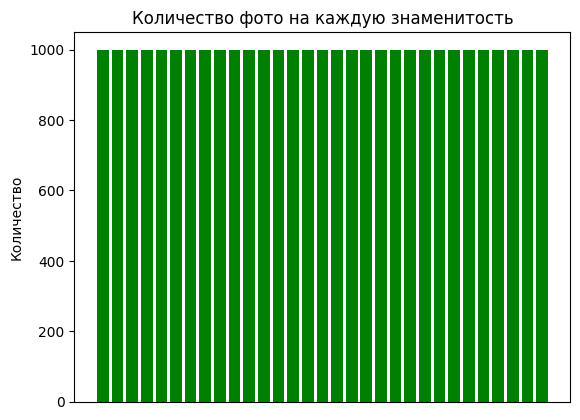

In [5]:
plt.bar(count_people.keys(), count_people.values(), color='g')
plt.xticks([])  # Устанавливаем пустые метки на оси X

# Добавление заголовка и меток осей (по желанию)
plt.title('Количество фото на каждую знаменитость')
plt.ylabel('Количество')

# Показать график
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12308\2053856056.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('save_dir_yolo/Akshay Kumar/Akshay Kumar_0.jpg')


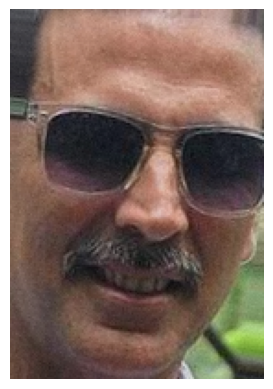

In [24]:
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import imageio
import matplotlib.pyplot as plt

# Загрузите изображение (например, из файла)
image = imageio.imread('save_dir_yolo/Akshay Kumar/Akshay Kumar_0.jpg')

# Определите последовательность аугментаций
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Горизонтальное отражение с вероятностью 50%
    iaa.Affine(rotate=(-25, 25), mode='edge'),  # Поворот на случайный угол от -25 до 25 градусов с режимом 'edge'
    iaa.Multiply((0.8, 1.2)),  # Изменение яркости (уменьшение или увеличение)
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # Добавление гауссовского шума
    iaa.LinearContrast((0.75, 1.5)),  # Изменение контраста
])

# Примените аугментации к изображению
augmented_image = seq(image=image)

# Отобразите результат
plt.imshow(augmented_image)
plt.axis('off')  # Отключить оси для лучшего отображения
plt.show()